In [1]:
%pylab inline
import pandas as pd 
data = pd.read_csv("turn_cheetah_query_log_for_uiuc_v1.csv")

Populating the interactive namespace from numpy and matplotlib


In [2]:
data.head()

,JOB_ID,USER_COMPANY_ID,BENEFICIARY_COMPANY_ID,WINDOW_START_TIME,WINDOW_END_TIME,SUBMISSION_TIME,START_TIME,FINISH_TIME,IS_SUCCESSFUL,IS_MULTI_QUERY,...,HDFS_BYTES_WRITTEN,TOTAL_LAUNCHED_MAPS,TOTAL_LAUNCHED_REDUCES,MAP_INPUT_RECORDS,MAP_OUTPUT_RECORDS,REDUCE_INPUT_RECORDS,REDUCE_INPUT_GROUPS,REDUCE_OUTPUT_RECORDS,SLOTS_MILLIS_MAPS,SLOTS_MILLIS_REDUCES
0,job-3432142755,company-2342552567,company-1554488253,1998_01_15 05:00:00,1998_04_04 04:59:59,1998_04_04 04:55:39,1998_04_04 07:19:20,1998_04_04 07:20:42,1,0,...,587309,1621,32,68201013,11281,8649,4367,4367,15713603,646243
1,job-3698996308,company-2342552567,company-1554488253,1998_03_27 05:00:00,1998_04_04 04:59:59,1998_04_04 04:56:16,1998_04_04 07:22:21,1998_04_04 07:24:51,1,0,...,25056,3960,9,883757542,198710,198710,457,457,48298333,190295
2,job-280950780,company-2342552567,company-1662668658,1998_02_08 05:00:00,1998_04_04 04:59:59,1998_04_04 05:41:10,1998_04_04 07:43:57,1998_04_04 07:45:11,1,0,...,11073633,1453,31,11809839,135028,79339,34138,34138,13158307,559258
3,job-909565294,company-2342552567,company-186432602,1997_10_07 04:00:00,1998_04_03 04:59:59,1998_04_04 05:41:20,1998_04_04 18:35:29,1998_04_04 18:58:45,1,0,...,997,18956,10,11634594931,8280,8280,2,2,239394231,1062991
4,job-246208440,company-2342552567,company-186432602,1998_03_01 05:00:00,1998_04_01 04:59:59,1998_04_04 05:41:26,1998_04_04 18:36:05,1998_04_04 18:46:50,1,0,...,997,4147,10,6980591912,8280,8280,2,2,107177437,292714


In [3]:
data[data.keys()[40:]].head()

,HAS_LIST_MAX_RANGE_FN,HAS_LIST_MIN_RANGE_FN,HAS_WHERE_CLAUSE,HAS_HAVING_CLAUSE,HAS_ORDER_BY_CLAUSE,HDFS_BYTES_READ,HDFS_BYTES_WRITTEN,TOTAL_LAUNCHED_MAPS,TOTAL_LAUNCHED_REDUCES,MAP_INPUT_RECORDS,MAP_OUTPUT_RECORDS,REDUCE_INPUT_RECORDS,REDUCE_INPUT_GROUPS,REDUCE_OUTPUT_RECORDS,SLOTS_MILLIS_MAPS,SLOTS_MILLIS_REDUCES
0,0,0,1,0,0,2.270191e+11,587309,1621,32,68201013,11281,8649,4367,4367,15713603,646243
1,0,0,1,0,0,1.243766e+12,25056,3960,9,883757542,198710,198710,457,457,48298333,190295
2,0,0,1,0,0,1.834767e+11,11073633,1453,31,11809839,135028,79339,34138,34138,13158307,559258
3,0,0,1,0,0,1.762003e+12,997,18956,10,11634594931,8280,8280,2,2,239394231,1062991
4,0,0,1,0,0,9.366595e+11,997,4147,10,6980591912,8280,8280,2,2,107177437,292714


In [147]:
dimensions=[] #dimensions of interest = COUNT
subpopulations_attrs=['IS_SUCCESSFUL','IS_MULTI_QUERY','IS_PROFILE_QUERY']#,'IS_EVENT_QUERY']

groupings = []
initial_subpopulation = ['IS_SUCCESSFUL']

In [148]:
subpopulations={}
for attr in subpopulations_attrs:
    subpopulations[attr]=list(set(data[attr]))

In [183]:
def bar(data,constraints):
    '''
    Given data subpopulation and constraint on subpopulation (e.g. C=c1),
    visualize barchart of all potential data attributes
    '''
    bool_constraints=1
    for constraint in constraints.iteritems():
        constraint_attr = constraint[0]
        constraint_val = constraint[1]
        bool_constraints=(bool_constraints)&(data[constraint_attr]==constraint_val)
    return data[bool_constraints].sum()[0]

In [184]:
data[bool_constraints].sum()

JOB_ID                            job-3221914619job-1663558432job-1339868872job-...
USER_COMPANY_ID                   company-3082026826company-2342552567company-23...
BENEFICIARY_COMPANY_ID            company-3082026826company-1554488253company-15...
WINDOW_START_TIME                 1997_04_30 16:00:001998_05_08 05:00:001998_05_...
WINDOW_END_TIME                   1998_04_07 15:59:591998_05_15 04:59:591998_05_...
SUBMISSION_TIME                   1998_04_08 12:47:081998_05_16 05:36:551998_05_...
START_TIME                        1998_04_08 12:49:081998_05_16 06:00:481998_05_...
FINISH_TIME                       1998_04_08 12:49:511998_05_16 06:02:031998_05_...
IS_SUCCESSFUL                                                                     0
IS_MULTI_QUERY                                                                    0
IS_PROFILE_QUERY                                                                281
IS_EVENT_QUERY                                                              

In [129]:
import itertools

In [133]:
print list(itertools.permutations(subpopulations_attrs, 2))

[('IS_SUCCESSFUL', 'IS_MULTI_QUERY'), ('IS_SUCCESSFUL', 'IS_PROFILE_QUERY'), ('IS_MULTI_QUERY', 'IS_SUCCESSFUL'), ('IS_MULTI_QUERY', 'IS_PROFILE_QUERY'), ('IS_PROFILE_QUERY', 'IS_SUCCESSFUL'), ('IS_PROFILE_QUERY', 'IS_MULTI_QUERY')]


In [135]:
attr_combos=list(itertools.permutations(subpopulations_attrs, 2))

In [136]:
list1=subpopulations[attr]
list2=[1,2]
[zip(x,list2) for x in itertools.permutations(list1,len(list2))]

[[('a', 1), ('b', 2)],
 [('a', 1), ('c', 2)],
 [('b', 1), ('a', 2)],
 [('b', 1), ('c', 2)],
 [('c', 1), ('a', 2)],
 [('c', 1), ('b', 2)]]

In [139]:
attr_combo=attr_combos[0]

In [141]:
attr = attr_combo[0]

In [ ]:
constraint_lst=[]
for attr_combo in attr_combos:
    for attr in attr_combo:
            

In [156]:
subpopulations[attr]

[0, 1]

In [170]:
constraints_lst=[{'IS_SUCCESSFUL':1,'IS_MULTI_QUERY':1,'IS_PROFILE_QUERY':1},{'IS_SUCCESSFUL':1,'IS_MULTI_QUERY':1},{'IS_SUCCESSFUL':0,'IS_MULTI_QUERY':0}]

In [177]:
measures=[]
#Filter tuples s.t satisfy all constraints
for constraints in constraints_lst:
    measures.append(bar(data,constraints))

In [172]:
measures

[1927, 3941, 393]

In [77]:
subpopulations

[[0, 1], [0, 1], [0, 1], [0, 1]]

In [84]:
import networkx as nx
G=nx.Graph()
G.add_node('a2')
G.add_node('A',val="a1")

In [86]:
G.add_node('A',val="a1")

In [87]:
# G.add_node('V1',viz=plt.plot([1,2,3],[1,2,3]))

In [88]:
pos=nx.spring_layout(G) 

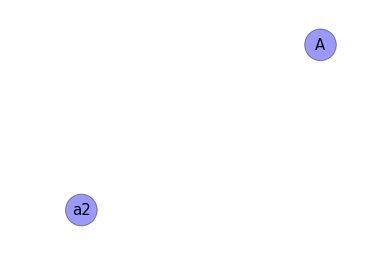

In [89]:
nx.draw_networkx_nodes(G,pos,alpha=0.4,node_size=1000,node_color='b')
nx.draw_networkx_labels(G,pos,font_size=15)
nx.draw_networkx_edge_labels(G,pos)
a = plt.axis('off')